## Exponentially Weighted Moving Averages

We just showed how to calculate the SMA based on some window. However, basic SMA has some weaknesses:

* Smaller windows will lead to more noise, rather than signal
* It will always lag by the size of the window
* It will never reach to full peak or valley of the data due to the averaging.
* Does not really inform you about possible future behavior, all it really does is describe trends in your data.
* Extreme historical values can skew your SMA significantly

To help fix some of these issues, we can use an EWMA (Exponentially weighted moving average).



In [1]:
# Library imports
import pandas as pd
import matplotlib.pyplot as plt

### Load the data

In [2]:
airline = pd.read_csv("D://ML-Datasets//Udemy-TimeSeries//airline_passengers.csv",
                     index_col='Month', parse_dates=True)

airline.head()

,Thousands of Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


### Simple Moving Averages

In [3]:
# 6 month SMA
airline['6-month-SMA'] = airline['Thousands of Passengers'].rolling(window=6).mean()
# 12 month SMA
airline['12-month-SMA'] = airline['Thousands of Passengers'].rolling(window=12).mean()

In [4]:
# Check the data now and Plot the attributes
airline.head()

,Thousands of Passengers,6-month-SMA,12-month-SMA
Month,,,
1949-01-01,112,NaN,NaN
1949-02-01,118,NaN,NaN
1949-03-01,132,NaN,NaN
1949-04-01,129,NaN,NaN
1949-05-01,121,NaN,NaN


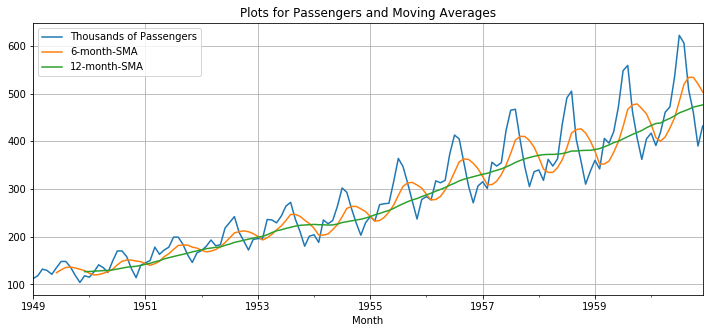

In [5]:
airline.plot(figsize=(12, 5), title='Plots for Passengers and Moving Averages', grid=True)

In [6]:
### Exponentially Weighted Moving Averages

airline['EWMA-6'] = airline['Thousands of Passengers'].ewm(span=6).mean()
airline['EWMA-12'] = airline['Thousands of Passengers'].ewm(span=12).mean()

airline.head()

,Thousands of Passengers,6-month-SMA,12-month-SMA,EWMA-6,EWMA-12
Month,,,,,
1949-01-01,112,NaN,NaN,112.000000,112.000000
1949-02-01,118,NaN,NaN,115.500000,115.250000
1949-03-01,132,NaN,NaN,122.917431,121.787529
1949-04-01,129,NaN,NaN,125.266892,124.064224
1949-05-01,121,NaN,NaN,123.769332,123.231685


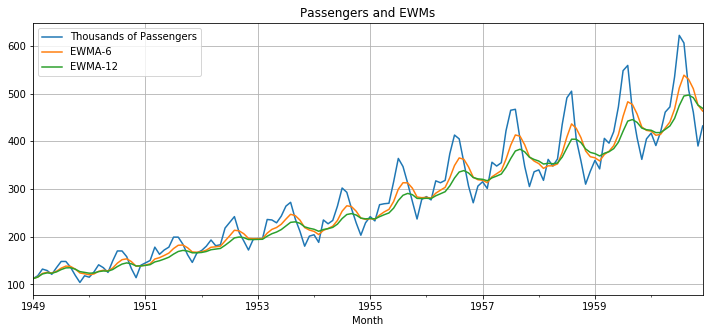

In [7]:
# Now plot of Passengers and EWMs

airline[['Thousands of Passengers', 'EWMA-6', 'EWMA-12']].plot(figsize=(12, 5), title='Passengers and EWMs', grid=True)

We see that the for both EWMA-12 and EWMA-6, the trend is more or less flat in the beginning and towards the recent time, the seasonality starts to show up, because the recent points are weighted more than the older data points.